# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/thongbui/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/thongbui/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

('data shape: ', (70000, 784))
('label shape:', (70000,))


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

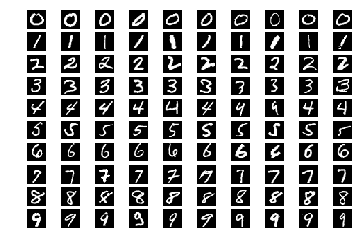

In [4]:
def P1(num_examples=10):
    # Here, I am using mini_train_data, mini_train_labels to build this grid
    data = mini_train_data
    labels = mini_train_labels
    
    plt.close('all')

    # Set up subplots for this 10x10 grid 
    f, axarr = plt.subplots(num_examples,num_examples)

    # for each digit (0->9), we will find 10 images and display them in 10 rows
    for i in range(num_examples):
        count = 0
        # Find this digit in mini_train_labels 10 times
        for j in range(len(labels)):
            # Get the 1st 10 elements of this digit
            if (count >= num_examples):
                break  # done with this digit, move on to the next digit
            # When the same digit is found, create the corresponding image and put it
            # in the current spot in the 10x10 grid
            if (labels[j] == i):
                # 1-D 784 list can be convert to 2-D 28x28 matrix
                digit = np.reshape(data[j],(28,28))
                axarr[i,count].axis('off')
                axarr[i,count].imshow(digit, cmap='gray', interpolation='nearest')
                count = count + 1

    plt.show()
    
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
data = mini_train_data
labels = mini_train_labels

def P2(k_values):
### STUDENT START ###
    for k in k_values:
        model = KNeighborsClassifier(k)
        model.fit(data, labels)
        predicted_labels = model.predict(dev_data)
        correct = (predicted_labels == dev_labels)
        print('For k = %d, number of correct predictions: %3.2f' %(k, (sum(correct)/dev_labels.size)))
        if (k == 1):
            print(classification_report(dev_labels, predicted_labels))
            
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]

P2(k_values)

For k = 1, number of correct predictions: 0.00
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

For k = 3, number of correct predictions: 0.00
For k = 5, number of correct predictions: 0.00
For k = 7, number of correct predictions: 0.00
For k = 9, number of correct predictions: 0.00


ANSWER: The most difficult digit is 3 (precision = 77%)

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):
### STUDENT START ###

    for i in train_sizes:
        start = time.time()
        data, labels = X[:i], Y[:i]

        model = KNeighborsClassifier(1)
        model.fit(data, labels)
        predicted_labels = model.predict(dev_data)
        correct = (predicted_labels == dev_labels)
        accuracy = (sum(correct)/dev_labels.size) * 100
        accuracies.append(accuracy)
        print("Train size = %d, percentage of correct predictions: %3.2f, elapsed time: %d msec" % (i, accuracy, (time.time() - start)))


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)
print(accuracies)

Train size = 100, percentage of correct predictions: 0.00, elapsed time: 0 msec
Train size = 200, percentage of correct predictions: 0.00, elapsed time: 0 msec
Train size = 400, percentage of correct predictions: 0.00, elapsed time: 0 msec
Train size = 800, percentage of correct predictions: 0.00, elapsed time: 1 msec
Train size = 1600, percentage of correct predictions: 0.00, elapsed time: 2 msec
Train size = 3200, percentage of correct predictions: 0.00, elapsed time: 4 msec
Train size = 6400, percentage of correct predictions: 0.00, elapsed time: 8 msec
Train size = 12800, percentage of correct predictions: 0.00, elapsed time: 18 msec
Train size = 25000, percentage of correct predictions: 0.00, elapsed time: 38 msec
[0, 0, 0, 0, 0, 0, 0, 0, 0]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

predict with linear regression [[ 124.30722604]]
predict with linear regression after using transformation  [[ 99.49773388]]


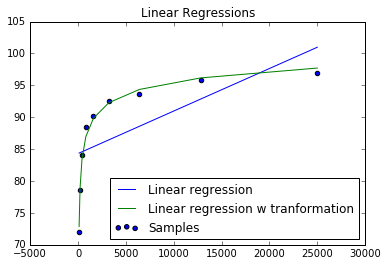

In [7]:
def P4():


### STUDENT START ###

    lr = LinearRegression(fit_intercept=True)
    X = np.reshape(train_sizes, (len(train_sizes),1))
    Y = np.reshape(accuracies, (len(accuracies),1))

    lr.fit(X,Y)
    predict1 = lr.predict(X)
    print("predict with linear regression", lr.predict([[60000]]))


    # Now let's try transformation using log(log(log(X)))
    def transform(V):
        #return (np.log(np.sqrt(V)))
        #return (100/ (1 + 100 * np.exp(-1 * np.log(V))))
        return np.log10(np.log10(np.log10(V)))

    lr = LinearRegression(fit_intercept=True)
    lr.fit(transform(X),Y)
    predict2 = lr.predict(transform(X))
    print("predict with linear regression after using transformation ", lr.predict(transform([[60000]])))

    plt.scatter(X,Y, label="Samples")
    plt.plot(X, predict1, label="Linear regression")
    plt.plot(X, predict2, label="Linear regression w tranformation")
    plt.title("Linear Regressions")
    plt.legend(loc="best")
    plt.show()
    
    #from sklearn import linear_model
    #clf = linear_model.LogisticRegression()
    #Y2 = Y.astype(int)
    #clf.fit(X, Y2)
    #print("predict using LogisticRegression: ", clf.predict([60000]))

### STUDENT END ###

P4()

ANSWER: the predicted value for n=60000 using linear regression is > 100% which is invalid. When I tried to use transformation function log(log(log(X))), the prediction value for n=60000 is 99.5% which is more reasonable

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Samples of true digit = 4, predicted digit = 9


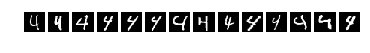

Samples of true digit = 9, predicted digit = 4


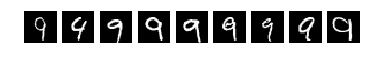

In [8]:
def P5():

### STUDENT START ###
    data = mini_train_data
    labels = mini_train_labels

    model = KNeighborsClassifier(1)
    model.fit(data, labels)
    predicted_labels = model.predict(dev_data)
        

    print(confusion_matrix(dev_labels, predicted_labels))
    
    # Now we will try to display some sample mistakes
    def displayIncorrect(true_digit, predicted_digit, sample_size):
        print("Samples of true digit = %d, predicted digit = %d" %(true_digit, predicted_digit))
        #sample_size = 14
        f, axarr = plt.subplots(1,sample_size)
        #true_digit = 4.0
        #predicted_digit = 9.0
        count = 0
        for i in range(len(dev_labels)):
            if (count >= sample_size):
                break
            if (dev_labels[i] == true_digit and predicted_labels[i] == predicted_digit):
                digit = np.reshape(dev_data[i],(28,28))
                axarr[count].axis('off')
                axarr[count].imshow(digit, cmap='gray', interpolation='nearest')
                count += 1

        plt.show()
        plt.close('all')


    displayIncorrect(4,9, 14)
    displayIncorrect(9, 4, 9)
    #displayIncorrect(2,3, 4)


### STUDENT END ###

P5()

From the confusion matrix above, the most confused pair of digits is (4,9):
    - 14 of 4 was predicted as 9
    - 9 of 9 was predicted as 4


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Before blurring:


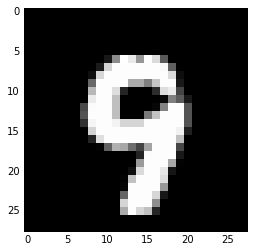

After blurring:


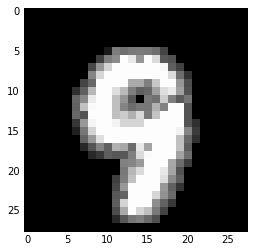

In [23]:
### STUDENT START ###

# For given a pixel position(x,y) in an image matrix
# calculate its blurred value. Note: surrounding pixels
# have less weight
def get_blur_value(image, x,y):
    max_x = 2
    if (x == 27):
        max_x = 1
            
    max_y = 2
    if (y == 27):
        max_y = 1
    sum = 0
    for i in range(-1,max_x):
        for j in range(-1,max_y):
            if (i==0 and j==0):
                sum += image[x+i,y+j]
            else:
                sum += image[x+i,y+j] * 0.65
    return sum/(max_x * max_y)                

# Given an image, make it blurred by finding a non-black pixel and blur its 
# surrounding pixels
def blur_image(src_image):
    blurred_image = src_image # np.array(src_image)
    for i in range(len(blurred_image)):
        for j in range(len(blurred_image)):
            # Pick a bright enough pixel and then blur itself and its surrounding ones
            if (blurred_image[i,j] > 0.5):
                for x in range(-1,2):
                    for y in range(-1,2):
                        if (i+x < len(blurred_image) and 
                            j+y < len(blurred_image) and
                            blurred_image[i+x,j+y] < 0.3):

                            blurred_image[i+x,j+y] = get_blur_value(blurred_image,i+x,j+y) 

#########################
def P6():
    data = mini_train_data
    labels = mini_train_labels
    digit = np.reshape(data[1],(28,28))
    print("Before blurring:")
    plt.imshow(digit, cmap='gray', interpolation='nearest')
    plt.show()
    digit2 = np.array(digit)
    blur_image(digit2)
    print("After blurring:")
    plt.imshow(digit2, cmap='gray', interpolation='nearest')
    plt.show()
    
## STUDENT END ###

P6()

In [24]:
# P6 part 2: I have to break P6 into these smaller parts because the execution for each part takes a long time
# so I want to leave them alone when I am done with them
def blur_all_images(data):
    print("blurring all images..")
    print(data.shape)
    for i in range(len(data)):
        if (i %10000 == 0):
            print(i)
        digit = np.reshape(data[i],(28,28))
        blur_image(digit)
        data[i] =  np.reshape(digit, 784)
    
## update the previous P2
def eval(k_values, test_data, test_labels, pred_data, pred_labels):
    for k in k_values:
        model = KNeighborsClassifier(k)
        model.fit(test_data, test_labels)
        predicted_labels = model.predict(pred_data)
        correct = (predicted_labels == pred_labels)
        print('For k = %d, number of correct predictions: %3.2f' %(k, (sum(correct)/pred_labels.size)))
        if (k == 1):
            print(classification_report(pred_labels, predicted_labels))

eval([1], train_data, train_labels, dev_data, dev_labels)


print("preprocess the training data but not the dev data")
train_data2 = np.array(train_data) # copy the data so we won't update directly
blur_all_images(train_data2)

print("evaluating..")
eval([1], train_data2, train_labels, dev_data, dev_labels)


For k = 1, number of correct predictions: 0.98
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98        99
        1.0       1.00      1.00      1.00       105
        2.0       0.98      0.96      0.97       102
        3.0       0.95      0.97      0.96        86
        4.0       0.99      0.98      0.99       104
        5.0       0.97      0.97      0.97        91
        6.0       0.99      0.98      0.98        98
        7.0       0.99      0.98      0.99       113
        8.0       0.98      0.93      0.95        96
        9.0       0.95      1.00      0.98       106

avg / total       0.98      0.98      0.98      1000

preprocess the training data but not the dev data
blurring all images..
(60000, 784)
0
10000
20000
30000
40000
50000
evaluating..
For k = 1, number of correct predictions: 0.96
             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97        99
        1.0       0.97      1.

In [25]:
print("preprocess the dev data but not the training data")
dev_data2 = np.array(dev_data) # copy the data so we won't update directly
blur_all_images(dev_data2)
eval([1], train_data, train_labels, dev_data2, dev_labels)


preprocess the dev data but not the training data
blurring all images..
(1000, 784)
0
For k = 1, number of correct predictions: 0.96
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98        99
        1.0       0.97      1.00      0.99       105
        2.0       0.98      0.96      0.97       102
        3.0       0.93      0.92      0.92        86
        4.0       0.97      0.96      0.97       104
        5.0       0.99      0.91      0.95        91
        6.0       0.98      0.98      0.98        98
        7.0       0.97      0.96      0.97       113
        8.0       0.92      0.96      0.94        96
        9.0       0.93      0.94      0.94       106

avg / total       0.96      0.96      0.96      1000



In [26]:
print("preprocess both training and dev data")
eval([1], train_data2, train_labels, dev_data2, dev_labels)

preprocess both training and dev data
For k = 1, number of correct predictions: 0.97
             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99        99
        1.0       0.98      1.00      0.99       105
        2.0       0.99      0.95      0.97       102
        3.0       0.95      0.92      0.93        86
        4.0       0.96      0.98      0.97       104
        5.0       0.99      0.97      0.98        91
        6.0       0.99      0.98      0.98        98
        7.0       0.98      0.97      0.98       113
        8.0       0.97      0.97      0.97        96
        9.0       0.95      0.98      0.96       106

avg / total       0.97      0.97      0.97      1000



ANSWER: As you can see the results after bluring the larger dataset (training), the prediction precision went down from average of 98% to 96% (either of training and dev is blurred) and 97% (both are blurred) as expected

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [27]:
def P7():

### STUDENT START ###
    data = np.array(mini_train_data) # copy the data so we won't update directly
    labels = mini_train_labels
    #for i in range(len(data)):
    #    data[i][data[i] > 0] = 1

    model = BernoulliNB(binarize=0.05)
    model.fit(data, labels)
    predicted_labels = model.predict(dev_data)
    correct = (predicted_labels == dev_labels)
    print(classification_report(dev_labels, predicted_labels))

    # Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black.
    for i in range(len(data)):
        data[i][data[i] >= 0.6 ] = 2
        data[i][(data[i] > 0.3) & (data[i] < 0.6)] = 1
        data[i][data[i] <= 0.3 ] = 0

    model = MultinomialNB()
    model.fit(data, labels)
    predicted_labels = model.predict(dev_data)
    correct = (predicted_labels == dev_labels)
    print(classification_report(dev_labels, predicted_labels))
    
### STUDENT END ###

P7()

             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92        99
        1.0       0.86      0.97      0.91       105
        2.0       0.88      0.78      0.83       102
        3.0       0.61      0.73      0.67        86
        4.0       0.88      0.79      0.83       104
        5.0       0.79      0.64      0.71        91
        6.0       0.87      0.87      0.87        98
        7.0       0.91      0.77      0.83       113
        8.0       0.76      0.77      0.76        96
        9.0       0.72      0.81      0.76       106

avg / total       0.82      0.81      0.81      1000

             precision    recall  f1-score   support

        0.0       0.90      0.96      0.93        99
        1.0       0.89      0.92      0.91       105
        2.0       0.85      0.80      0.82       102
        3.0       0.63      0.74      0.68        86
        4.0       0.90      0.67      0.77       104
        5.0       0.84      0.56      0.67

ANSWER: Comparing precision results from Bernoulli and MultinomialNB, I am seeing that the precision was better for some (0,1,4, 7) but worse of the rest

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [28]:
def P8(alphas):

### STUDENT START ###
    
    gscv = GridSearchCV(BernoulliNB(binarize=0.5), alphas , scoring='precision')
    gscv.fit(mini_train_data, mini_train_labels)
    print(gscv.grid_scores_) #.best_scores_)

    return gscv
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Users/thongbui/anaconda3/lib/python3.5/site-packages/sklearn/naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
/Users/thongbui/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/thongbui/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/thongbui/anaconda3/lib/python3.5/site-package

[mean: 0.00846, std: 0.00015, params: {'alpha': 0.0}, mean: 0.82606, std: 0.01988, params: {'alpha': 0.0001}, mean: 0.82859, std: 0.01827, params: {'alpha': 0.001}, mean: 0.83000, std: 0.01676, params: {'alpha': 0.01}, mean: 0.82260, std: 0.01816, params: {'alpha': 0.1}, mean: 0.80850, std: 0.01208, params: {'alpha': 0.5}, mean: 0.80344, std: 0.01158, params: {'alpha': 1.0}, mean: 0.79391, std: 0.01813, params: {'alpha': 2.0}, mean: 0.78077, std: 0.02174, params: {'alpha': 10.0}]


/Users/thongbui/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [29]:
print(nb.best_params_)

{'alpha': 0.01}


ANSWER: best value for alpha is 0.01, accurancy= 0.00846 when alpha=0

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [30]:
def P9():

### STUDENT END ###
    data = mini_train_data
    labels = mini_train_labels

    clf = GaussianNB()
    clf.fit(data, labels)

    predicted_labels = clf.predict(dev_data)
    print(classification_report(dev_labels, predicted_labels))
    
    # Here I am trying to tune sigma_, theta_ to improve the precisions  
    print("tune sigma_, theta_ to improve the precisions")
    for i in range(len(clf.sigma_)):
        clf.sigma_[i] += 0.01
    for i in range(len(clf.theta_)):
        clf.theta_[i] += 0.2
    predicted_labels = clf.predict(dev_data)
    print(classification_report(dev_labels, predicted_labels))

    return clf
### STUDENT END ###

gnb = P9()

             precision    recall  f1-score   support

        0.0       0.75      0.84      0.79        99
        1.0       0.82      0.89      0.85       105
        2.0       0.62      0.39      0.48       102
        3.0       0.62      0.45      0.52        86
        4.0       0.80      0.39      0.53       104
        5.0       0.52      0.36      0.43        91
        6.0       0.69      0.88      0.77        98
        7.0       0.84      0.48      0.61       113
        8.0       0.41      0.61      0.49        96
        9.0       0.47      0.88      0.61       106

avg / total       0.66      0.62      0.61      1000

tune sigma_, theta_ to improve the precisions
             precision    recall  f1-score   support

        0.0       0.95      0.90      0.92        99
        1.0       0.99      0.83      0.90       105
        2.0       0.76      0.90      0.83       102
        3.0       0.68      0.76      0.71        86
        4.0       0.80      0.87      0.83       

ANSWER: By adding 0.01 to sigma_ and 0.2 to theta_, I was able to increase the accuracy of the prediction from 66% avg to 83%

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

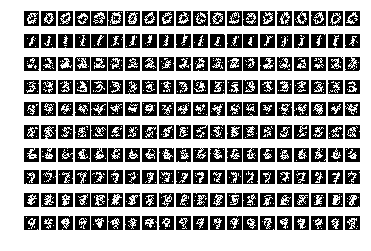

In [31]:
def P10(num_examples):

### STUDENT START ###
    data = np.array(mini_train_data) # copy the data so we won't update directly
    labels = mini_train_labels

    model = BernoulliNB(binarize=0.00001)
    model.fit(data, labels)
        
    # The estimated probability of each pixel is stored in feature_log_prob_. 
    # use np.exp() to convert a log probability back to a probability.
    pixel_prob = np.exp(model.feature_log_prob_)

    # generate a 10x20 grid with 20 examples of each digit, each pixel output will be either 0 or 1
    grid = np.zeros((10,20), dtype='int32')
    for i in range(len(grid)):
        grid[i] = i
    
    f, axarr = plt.subplots(10,20)

    # compare with the probablity you generate from the bernouliNB,
    # if the number in the matrix is less than the probabilty , print 1, other wise print 0    
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            # generate a matrix with np.random.rand(28,28)
            matrix = np.random.rand(28*28)
            image = np.zeros(28*28)
            number = grid[i][j]
            for k in range(len(pixel_prob[number])):
                if (pixel_prob[number][k] < matrix[k]):
                    image[k] = 0
                else:
                    image[k] = 1
            
            digit = np.reshape(image,(28,28))
            axarr[i,j].axis('off')
            axarr[i,j].imshow(digit, cmap='gray', interpolation='nearest')
                    
    plt.show()

### STUDENT END ###

P10(20)

ANSWER: The generated digits are a lot more blurry, grainy comparing to the original ones

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [32]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    data = mini_train_data
    labels = mini_train_labels

    clf = BernoulliNB(alpha=0.1)
    clf.fit(data, labels)
    predicted_labels = clf.predict(dev_data)
    prob = clf.predict_proba(dev_data)
    
    for i in range(len(predicted_labels)):
        max_prob = max(prob[i])
        for j in range(len(buckets)):
            if (max_prob <= buckets[j]):
                total[j] += 1
                if (predicted_labels[i] == dev_labels[i]):
                    correct[j] += 1
                break
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   2    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  31    accuracy = 0.387
p(pred) <= 0.9990000000000    total =  71    accuracy = 0.493
p(pred) <= 0.9999900000000    total =  53    accuracy = 0.434
p(pred) <= 0.9999999000000    total =  64    accuracy = 0.609
p(pred) <= 0.9999999990000    total =  46    accuracy = 0.543
p(pred) <= 0.9999999999900    total =  52    accuracy = 0.808
p(pred) <= 0.9999999999999    total =  49    accuracy = 0.796
p(pred) <= 1.0000000000000    total = 632    accuracy = 0.951


ANSWER: Using alpha = 0.1, we are getting posterior probablity 99.98% (9998 out 1000 samples) with p(pred) >= 0.9. So I would say this calibration for this BernoulliNB model is very strong

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()